<a href="https://colab.research.google.com/github/mechamrit/Screentime_detection/blob/master/Screentime_Detection_of_Characters_of_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Facial Recognition Tool 


## Copying the Dataset in this system 
[Link to GDRIVE dataset](https://drive.google.com/open?id=1TiUfMgrTHd79mvZYp7oqoNMJDvSKY9pL)

## Link to the generated Video
[link](https://drive.google.com/open?id=1-ARC7pyXZneLsE47Z0mHHxLSW88OShY5)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp -r /content/drive/My\ Drive/Untrodden_Final /content/

### The data was taken from google Image


With Following Script 


```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```
And then Downloaded and remove the corrrupted files. After preprocessed data personally and removing the unrrelated Images



```
# next you will need this FastAI library
from fastai.vision import *
# define path
path = Path('/content/drive/My Drive/Untrodden_labs/')

#load images
for file, folder in [('Salman1.csv', 'Salman_Khan')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=403)
    
verify_images(path/'Salman_Khan', delete=True, max_size=224)    
```




## Downloading the Trailer from Youtube

In [0]:
!pip install pytube

In [0]:
from pytube import YouTube
video_link = 'https://www.youtube.com/watch?v=-AJ7cLi1Jfk'
vid = YouTube(video_link)
stream = vid.streams.first()
stream.download()

'/content/Dabangg 3 Official Trailer  Salman Khan  Sonakshi Sinha  Prabhu Deva  20th Dec19.mp4'

In [0]:
## Renaming 
!mv /content/Dabangg*.mp4 /content/Dabangg_Trailer.mp4

## Real Thing Begins Now

In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 81kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=a4d8d0832d6ab29e84fa35d27850ad22e9fa0b895f6c13aec21ce695a3b8f033
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


### Encoding Faces

In [0]:
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os
import imutils

In [0]:
## Reading the video and getting the length
input_movie = cv2.VideoCapture("/content/Dabangg_Trailer.mp4")
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

4856


In [0]:
## Parameters
dataset = "/content/Untrodden_Final/Dataset/"
encoding = "/content/encodings.pickle"
detection_method = "cnn"

In [0]:
# Grab the paths to the input images in our dataset
imagePaths = list(paths.list_images(dataset))
print(imagePaths)
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

['/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000002.jpeg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000050.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000026.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000054.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000027.jpeg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000049.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000001.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000006.jpeg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000040.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000055.JPG', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000039.JPG', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000018.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000052.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000051.jpg', '/content/Untrodden_Final/Dataset/Sonakshi_Sinha/00000046.jpg', '/content/Untrodden_Final/Dataset/So

In [0]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):

	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]

	# load the input image and convert it from BGR (OpenCV ordering)
	# to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
	boxes = face_recognition.face_locations(rgb,
		model=detection_method)
 
	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)
 
	# loop over the encodings
	for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
		knownEncodings.append(encoding)
		knownNames.append(name)

[INFO] processing image 1/113
[INFO] processing image 2/113
[INFO] processing image 3/113
[INFO] processing image 4/113
[INFO] processing image 5/113
[INFO] processing image 6/113
[INFO] processing image 7/113
[INFO] processing image 8/113
[INFO] processing image 9/113
[INFO] processing image 10/113
[INFO] processing image 11/113
[INFO] processing image 12/113
[INFO] processing image 13/113
[INFO] processing image 14/113
[INFO] processing image 15/113
[INFO] processing image 16/113
[INFO] processing image 17/113
[INFO] processing image 18/113
[INFO] processing image 19/113
[INFO] processing image 20/113
[INFO] processing image 21/113
[INFO] processing image 22/113
[INFO] processing image 23/113
[INFO] processing image 24/113
[INFO] processing image 25/113
[INFO] processing image 26/113
[INFO] processing image 27/113
[INFO] processing image 28/113
[INFO] processing image 29/113
[INFO] processing image 30/113
[INFO] processing image 31/113
[INFO] processing image 32/113
[INFO] processing

In [0]:
# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open(encoding, "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] serializing encodings...


## Recognizing Face in Picture

In [0]:
image = "/content/img.png"


# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open(encoding, "rb").read())
 
# load the input image and convert it from BGR to RGB
image = cv2.imread(image)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,
	model=detection_method)
encodings = face_recognition.face_encodings(rgb, boxes)
 
# initialize the list of names for each face detected
names = []

# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"
  	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
 
		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1
 
		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)
 
 

[INFO] loading encodings...
[INFO] recognizing faces...


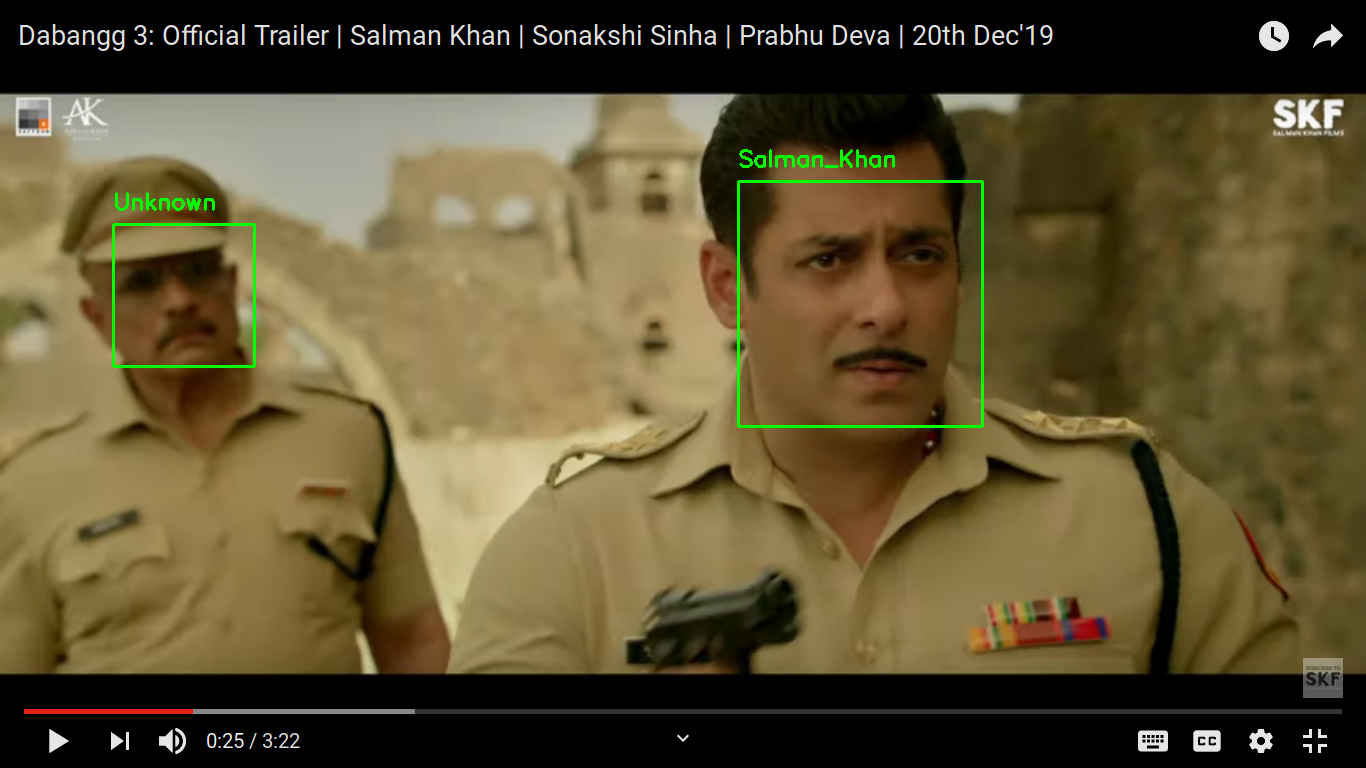

In [0]:
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.75, (0, 255, 0), 2)
 
# show the output image
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Now it is succesfully detecting the Face

## Recognizing the Face in Video

In [0]:
## Initializing the Values
counter_salman = 0
counter_sonakshi = 0
counter_unknown = 0
output = "/content/Trailer_output.avi"
display=0
detection_method = "cnn"
input_path = "/content/Dabangg_Trailer.mp4"

In [0]:
## Lets capture Total Number of Frames
input_movie = cv2.VideoCapture(input_path)
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

4856


##### Detecting Frame By Fram

In [0]:
print("[INFO] loading encodings...")
data = pickle.loads(open("/content/encodings.pickle", "rb").read())

# initialize the pointer to the video file and the video writer
print("[INFO] processing video...")
stream = cv2.VideoCapture(input_path)
writer = None

# loop over frames from the video file stream
while True: 
  # grab the next frame
  (grabbed, frame) = stream.read()

  # if the frame was not grabbed, then we have reached the
  # end of the stream
  if not grabbed:
    break

	# convert the input frame from BGR to RGB then resize it to have
	# a width of 750px (to speedup processing)
  rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  rgb = imutils.resize(frame, width=750)
  r = frame.shape[1] / float(rgb.shape[1])

	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input frame, then compute
	# the facial embeddings for each face
  boxes = face_recognition.face_locations(rgb,
    model=detection_method)
  encodings = face_recognition.face_encodings(rgb, boxes)
  names = []

	# loop over the facial embeddings
  for encoding in encodings:
		# attempt to match each face in the input image to our known
		# encodings
    matches = face_recognition.compare_faces(data["encodings"],
    encoding)
    name = "Unknown"

		# check to see if we have found a match
    if True in matches:
			# find the indexes of all matched faces then initialize a
			# dictionary to count the total number of times each face
			# was matched
      matchedIdxs = [i for (i, b) in enumerate(matches) if b]
      counts = {}

			# loop over the matched indexes and maintain a count for
			# each recognized face 
      for i in matchedIdxs:
        name = data["names"][i]
        counts[name] = counts.get(name, 0) + 1

			# determine the recognized face with the largest number
			# of votes (note: in the event of an unlikely tie Python
			# will select first entry in the dictionary)
      name = max(counts, key=counts.get)
      if(name == "Salman_Khan"):
        counter_salman = counter_salman+1
      elif(name =="Sonakshi_Sinha"):
        counter_sonakshi=counter_sonakshi +1
      else:
        counter_unknown = counter_unknown +1

		# update the list of names
    names.append(name)

	# loop over the recognized faces
  for ((top, right, bottom, left), name) in zip(boxes, names):
		# rescale the face coordinates
    top = int(top * r)
    right = int(right * r)
    bottom = int(bottom * r)
    left = int(left * r)

		# draw the predicted face name on the image
    cv2.rectangle(frame, (left, top), (right, bottom),
      (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(frame, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
      0.75, (0, 255, 0), 2)

	# if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
  if writer is None and output is not None:
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    writer = cv2.VideoWriter(output, fourcc, 24,
      (frame.shape[1], frame.shape[0]), True)

	# if the writer is not None, write the frame with recognized
	# faces t odisk
  if writer is not None:
	  writer.write(frame)

	# check to see if we are supposed to display the output frame to
	# the screen
  if display > 0:
    cv2_imshow(frame)
    key = cv2.waitKey(1) & 0xFF


# close the video file pointers
stream.release()

# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()

[INFO] loading encodings...
[INFO] processing video...


In [0]:
!cp /content/Trailer_output.avi /content/drive/My\ Drive/Untrodden_Final/trailer_final_output.avi

### Get Screentime of Actors

In [0]:
## Screentime of Actors
print(counter_salman)
print(counter_sonakshi)
print(counter_unknown)


2432
626
626


In [0]:
## Fps of trailer
fps = int(input_movie.get(cv2.CAP_PROP_FPS))
print(fps)

24


In [0]:
### Therefore the frame rate is 24 frame per second
salman_screentime_sec = counter_salman/fps
sonakshi_screentime_sec = counter_sonakshi/fps
unknown_screentime_sec = counter_unknown/fps

print("Salman Khan Screen Time {} seconds", salman_screentime_sec)
print("Sonakshi Sinha Screen Time {} seconds", sonakshi_screentime_sec)
print("Unknown Characters ScreenTime {} seconds", unknown_screentime_sec)

Salman Khan Screen Time {} seconds 101.33333333333333
Sonakshi Sinha Screen Time {} seconds 26.083333333333332
Unknown Characters ScreenTime {} seconds 26.083333333333332


## Theory 
I have tried for the given Dataset but faces are not available in that quantity and there is lot of unrelated images, also I have been blocked by COLAB for overusing the resources. But I have performed this with the latest Dabang 3 trailer short and Sample.


## Building the Dataset
The dataset was made with the google images with the face pics of actors. Then 128-d embeddings for each face in the dataset. </br> We will be using the same 128-d Embeddings to recognize the faces of characters in videos and images.Here I am using dlib which is already trained on many pics (Standing on the Shoulder of Giant).
</br>
After that simple Knn + Votes are used to make the final face classifcation. 
</br></br>
## Intituion For Detecting the Screen Time
Intitution behind detecting the screen time is that the videos consist of the images. The actors are identified for each and every frame and frame counter is incremented for the actor Identified. 
</br>
After getting the number of frames that the actor has appeared we can calculate the time by using the fps.
</br>
Therefore Final Formula will be
</br>
Actor_time(in_sec) = Actor_frames / fps
</br>
*** There can be some error while identifying the face in the images such as because of different angles and dataset is not diverse so it will be more inclined in detecting the dataset so can sometime give unknown names of the character. we can use some threshold for this.

**  Although its not very accurate but accurate model can be built with the sufficient time and efforts but concept will be the same.


### References
1. The evergreen blog https://www.pyimagesearch.com/
2. https://arxiv.org/abs/1512.03385
3. https://github.com/ageitgey/face_recognition